In [2]:
import pandas as pd
import numpy as np
import datetime
import math as mat
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
jobs_df = pd.read_csv('july-2017-thru-june-2018.txt', sep='|')

C:\Users\jnske\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
jobs_df.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


Are there any nodes that fail more than the other ones?

In [5]:
jobs_df.State.unique()

array(['COMPLETED', 'TIMEOUT', 'CANCELLED by 29607', 'FAILED',
       'CANCELLED by 454080', 'CANCELLED by 100684',
       'CANCELLED by 667840', 'CANCELLED by 660360',
       'CANCELLED by 481000', 'CANCELLED by 0', 'CANCELLED by 229215',
       'CANCELLED by 633620', 'CANCELLED by 207302',
       'CANCELLED by 124006', 'CANCELLED by 112602',
       'CANCELLED by 172079', 'CANCELLED by 199052',
       'CANCELLED by 156369', 'CANCELLED by 389801', 'NODE_FAIL',
       'CANCELLED by 123148', 'CANCELLED by 501421',
       'CANCELLED by 525961', 'CANCELLED by 352698',
       'CANCELLED by 169859', 'CANCELLED by 144605', 'CANCELLED by 85636',
       'CANCELLED by 240352', 'CANCELLED by 195638',
       'CANCELLED by 534784', 'CANCELLED by 379605',
       'CANCELLED by 308082', 'CANCELLED by 28075', 'CANCELLED by 337100',
       'CANCELLED by 497968', 'CANCELLED by 485800',
       'CANCELLED by 237813', 'CANCELLED by 504485',
       'CANCELLED by 174942', 'CANCELLED by 171742',
       'CANCEL

In [6]:
jobs_mask = jobs_df['NodeList'].str[3]!='['
jobs_mask.head()

0    True
1    True
2    True
3    True
4    True
Name: NodeList, dtype: bool

In [7]:
Jobs_df=jobs_df[jobs_mask]
Jobs_df.shape

(12480099, 25)

In [8]:
#Slice the dataframe to show all failed jobs
jobs_failure = Jobs_df[(Jobs_df.State=="NODE_FAIL")]
#jobs_failure = Jobs_df[Jobs_df.State=="NODE_FAIL"]
jobs_failure.State.unique()
# jobs_failure.shape

array(['NODE_FAIL'], dtype=object)

In [9]:
#Drop unused columns
jobs_failed=jobs_failure[['JobID', 'ExitCode', 'State', 'NodeList']]
jobs_failed.head()

,JobID,ExitCode,State,NodeList
22163,15839577_49,0:0,NODE_FAIL,vmp1342
22166,15839577_2,0:0,NODE_FAIL,vmp1055
22167,15839577_3,0:0,NODE_FAIL,vmp1043
22204,15839577_40,0:0,NODE_FAIL,vmp1342
22205,15839577_41,0:0,NODE_FAIL,vmp1342


In [10]:
#Count how many times each node has failed
pd.DataFrame(jobs_failed.NodeList.value_counts());

In [11]:
#Count how many times every node has been used overall
pd.DataFrame(Jobs_df.NodeList.value_counts());

In [12]:
failed = {}
for key, value in jobs_failed[jobs_failed.State.isin(['NODE_FAIL'])].groupby('NodeList').size().iteritems():
    failed.update({key: value})  

In [13]:
failed_df = pd.DataFrame.from_dict(failed, orient='index', columns=["failures"])
# failed_df['node'] = failed_df.index
failed_df.reset_index(level=0, inplace=True)
# failed_df.columns(['node', 'failures'])
failed_df.head()

,index,failures
0,gpu0001,2
1,gpu0002,1
2,gpu0003,1
3,gpu0004,2
4,gpu0005,2


In [14]:
total = {}
for key, value in Jobs_df.groupby('NodeList').size().iteritems():
    total.update({key: value})  

In [15]:
total_df = pd.DataFrame.from_dict(total, orient='index', columns=["uses"])
total_df.reset_index(level=0, inplace=True)
total_df.head()

,index,uses
0,None assigned,3470227
1,amn0008,130
2,amn0009,109
3,gpu0001,5891
4,gpu0002,4072


In [16]:
overall_df = pd.merge(total_df, failed_df, how='outer')
overall_df.head()

,index,uses,failures
0,None assigned,3470227,NaN
1,amn0008,130,NaN
2,amn0009,109,NaN
3,gpu0001,5891,2.0
4,gpu0002,4072,1.0


In [17]:
overall_df.shape

(664, 3)

In [18]:
total_df.shape

(664, 2)

In [19]:
overall_df['Pct_Fail'] = ""
overall_df.head()

,index,uses,failures,Pct_Fail
0,None assigned,3470227,NaN,
1,amn0008,130,NaN,
2,amn0009,109,NaN,
3,gpu0001,5891,2.0,
4,gpu0002,4072,1.0,


In [20]:
overall_df['failures'].fillna(0, inplace=True)

In [21]:
overall_df['Pct_Fail']=overall_df.failures/overall_df.uses*100
overall_df.head()

,index,uses,failures,Pct_Fail
0,None assigned,3470227,0.0,0.000000
1,amn0008,130,0.0,0.000000
2,amn0009,109,0.0,0.000000
3,gpu0001,5891,2.0,0.033950
4,gpu0002,4072,1.0,0.024558


In [22]:
overall_df.dtypes

index        object
uses          int64
failures    float64
Pct_Fail    float64
dtype: object

In [23]:
overall_df.sort_values("Pct_Fail", ascending = False, inplace = True)
overall_df.head()

,index,uses,failures,Pct_Fail
42,vm-qa-node004,6,1.0,16.666667
629,vmp595,1018,8.0,0.785855
632,vmp598,1042,7.0,0.671785
626,vmp592,1084,7.0,0.645756
647,vmp692,1117,7.0,0.626679


In [24]:
overall_full_subset = overall_df[overall_df['Pct_Fail']>0]
overall_full_subset = overall_full_subset[overall_full_subset['Pct_Fail']<1]
overall_full_subset.head()

,index,uses,failures,Pct_Fail
629,vmp595,1018,8.0,0.785855
632,vmp598,1042,7.0,0.671785
626,vmp592,1084,7.0,0.645756
647,vmp692,1117,7.0,0.626679
649,vmp696,1118,7.0,0.626118


In [25]:
overall_final = overall_full_subset.head(25)
overall_final.columns = ['Node', 'uses', 'failures', 'Pct_Fail']
overall_final

,Node,uses,failures,Pct_Fail
629,vmp595,1018,8.0,0.785855
632,vmp598,1042,7.0,0.671785
626,vmp592,1084,7.0,0.645756
647,vmp692,1117,7.0,0.626679
649,vmp696,1118,7.0,0.626118
24,gpu0022,505,3.0,0.594059
648,vmp695,1097,5.0,0.455789
12,gpu0010,1097,5.0,0.455789
631,vmp597,1099,5.0,0.454959
651,vmp698,1147,5.0,0.435920


In [26]:
# overall_full_subset=overall_df[overall_subset]
overall_full_subset.tail()

,index,uses,failures,Pct_Fail
50,vmp1010,36912,1.0,0.002709
46,vmp1003,38681,1.0,0.002585
257,vmp1298,47568,1.0,0.002102
44,vmp1001,66221,1.0,0.001510
368,vmp1409,92419,1.0,0.001082


In [27]:
overall_full_subset.shape

(592, 4)

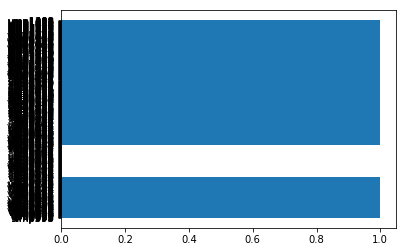

In [28]:
plt.barh(overall_full_subset['index'], width = 1, align = 'center')
plt.show()

In [29]:
overall_full_subset.Pct_Fail.describe()

count    592.000000
mean       0.044829
std        0.082634
min        0.001082
25%        0.010810
50%        0.026098
75%        0.049695
max        0.785855
Name: Pct_Fail, dtype: float64

C:\Users\jnske\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


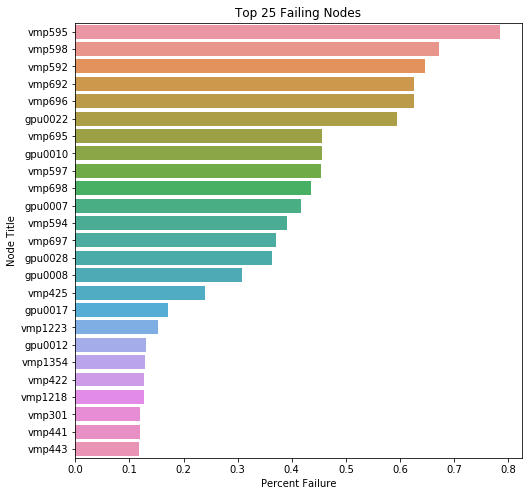

In [30]:
plt.figure(figsize = (8, 8))
sns.barplot(overall_final.Pct_Fail, overall_final.Node, orient='h');
ax = plt.axes();
ax.set_title('Top 25 Failing Nodes');
ax.set(xlabel = 'Percent Failure', ylabel = 'Node Title');

C:\Users\jnske\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


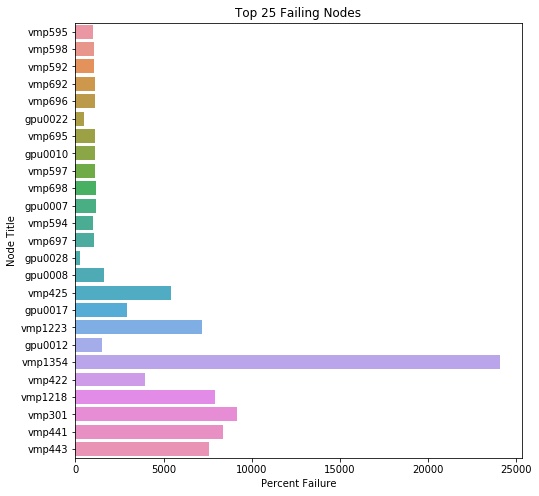

In [31]:
plt.figure(figsize = (8, 8))
sns.barplot(overall_final.failures, overall_final.Node);
sns.barplot(overall_final.uses, overall_final.Node);
ax = plt.axes();
ax.set_title('Top 25 Failing Nodes');
ax.set(xlabel = 'Percent Failure', ylabel = 'Node Title');

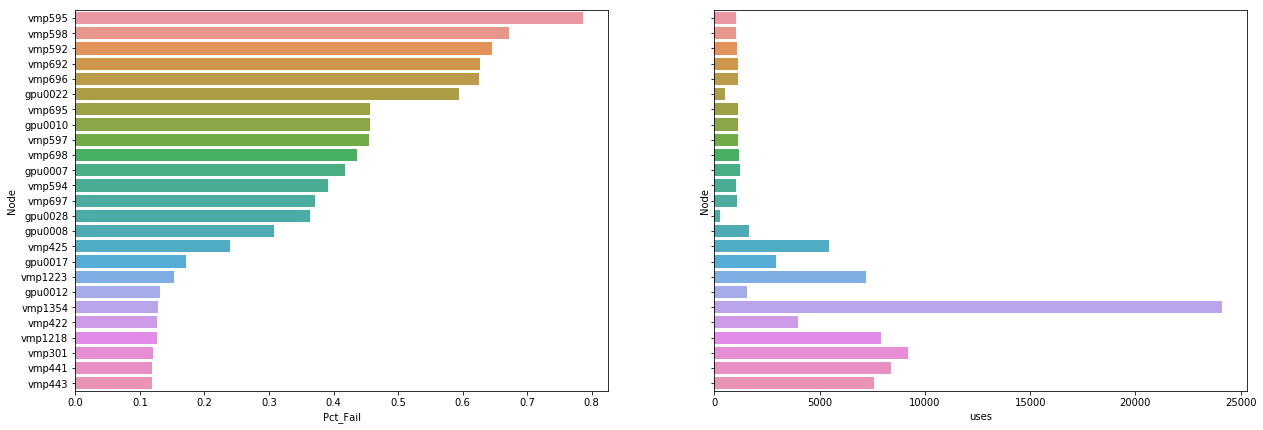

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (21,7), sharey=True)
sns.barplot(overall_final.Pct_Fail, overall_final.Node, orient='h', ax=ax1);
# plt.close(0)
# plt.show(block=False)
# ax = plt.axes();
# ax.set_title('Top 25 Failing Nodes');
# ax.set(xlabel = 'Percent Failure', ylabel = 'Node Title');

sns.barplot(overall_final.uses, overall_final.Node, orient='h', ax=ax2);
plt.show()
# ax = plt.axes();
# ax.set_title('Top 25 Failing Nodes');
# ax.set(xlabel = 'Percent Failure', ylabel = 'Node Title');